In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame, Series
import datetime
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot styling
import numpy as np
pd.__version__
%matplotlib inline
king = pd.read_csv('../data/kc_house_data 2 copy.csv')

madison_park=king[king['zipcode']==98112]
wallingford=king[king['zipcode']== 98103]
raineer_beach=king[king['zipcode']== 98118]
i90=king[king['zipcode']== 98144]

df_Seattle=madison_park.append([wallingford,raineer_beach,i90])
df_Seattle["remodel"] = abs(np.sign(0-df_Seattle.yr_renovated))
df_Seattle["built"] = ((df_Seattle.years_since_built/10))
df_Seattle['built'] = df_Seattle['built'].apply(int);

House Sales in King County, USA
-----


Why Housing Sales in King County?

img src="image.png"
----

- Surging home prices


Data Cleaning
------




In [59]:
df_Seattle.groupby('bedrooms').count()

,id,date,years_since_sell_2017,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,years_since_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,remodel,built
bedrooms,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
2,424,424,424,424,424,424,424,424,424,424,...,424,424,424,424,424,424,424,424,424,424
3,716,716,716,716,716,716,716,716,716,716,...,716,716,716,716,716,716,716,716,716,716
4,377,377,377,377,377,377,377,377,377,377,...,377,377,377,377,377,377,377,377,377,377
5,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
6,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
7,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
8,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [60]:
#bedrooms
df_Seattle = df_Seattle[df_Seattle.bedrooms != 0]
df_Seattle= df_Seattle[df_Seattle.bedrooms <= 6]

df_Seattle.groupby('bedrooms').count()

,id,date,years_since_sell_2017,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,years_since_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,remodel,built
bedrooms,,,,,,,,,,,,,,,,,,,,,
1,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
2,424,424,424,424,424,424,424,424,424,424,...,424,424,424,424,424,424,424,424,424,424
3,716,716,716,716,716,716,716,716,716,716,...,716,716,716,716,716,716,716,716,716,716
4,377,377,377,377,377,377,377,377,377,377,...,377,377,377,377,377,377,377,377,377,377
5,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
6,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35


In [61]:

#bathrooms
df_Seattle= df_Seattle[df_Seattle.bathrooms >= 1]
df_Seattle = df_Seattle[df_Seattle.bathrooms != 1.25]
df_Seattle= df_Seattle[df_Seattle.bathrooms <= 3.75]

#floors
df_Seattle= df_Seattle[df_Seattle.floors != 3.5]

#condition
df_Seattle= df_Seattle[df_Seattle.condition > 2]

#grade
df_Seattle= df_Seattle[df_Seattle.grade != 5]
df_Seattle= df_Seattle[df_Seattle.grade != 11]
df_Seattle= df_Seattle[df_Seattle.grade != 12]
df_Seattle=df_Seattle.drop(["view","waterfront","lat","long","date","yr_built","years_since_built","yr_renovated"], axis=1)

df_Seattle['years_since_sell_2017'] = df_Seattle['years_since_sell_2017'].apply(str);
df_Seattle['bedrooms'] = df_Seattle['bedrooms'].apply(str);
df_Seattle['bathrooms'] = df_Seattle['bathrooms'].apply(str);
df_Seattle['floors'] = df_Seattle['floors'].apply(str);
df_Seattle['condition'] = df_Seattle['condition'].apply(str);
df_Seattle['grade'] = df_Seattle['grade'].apply(str);
df_Seattle['built'] = df_Seattle['built'].apply(str);
df_Seattle['remodel'] = df_Seattle['remodel'].apply(str);
df_Seattle['zipcode'] = df_Seattle['zipcode'].apply(str);

EDA
------

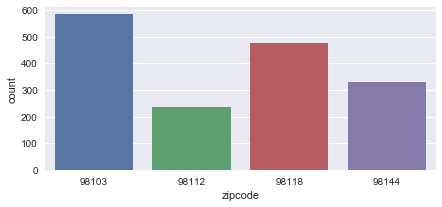

In [62]:
fig, ax = plt.subplots(figsize=(7,3))  
ax = sns.countplot(x="zipcode", data=df_Seattle,ax=ax)

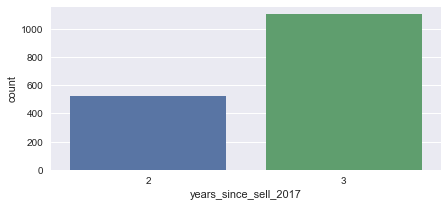

In [63]:
fig, ax = plt.subplots(figsize=(7,3))  
ax = sns.countplot(x="years_since_sell_2017", data=df_Seattle,ax=ax)

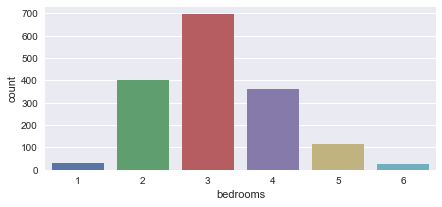

In [64]:
fig, ax = plt.subplots(figsize=(7,3))  
ax = sns.countplot(x="bedrooms", data=df_Seattle,ax=ax)

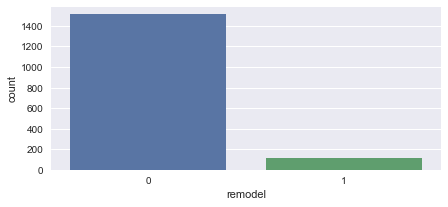

In [65]:
fig, ax = plt.subplots(figsize=(7,3))  
ax = sns.countplot(x="remodel", data=df_Seattle,ax=ax)

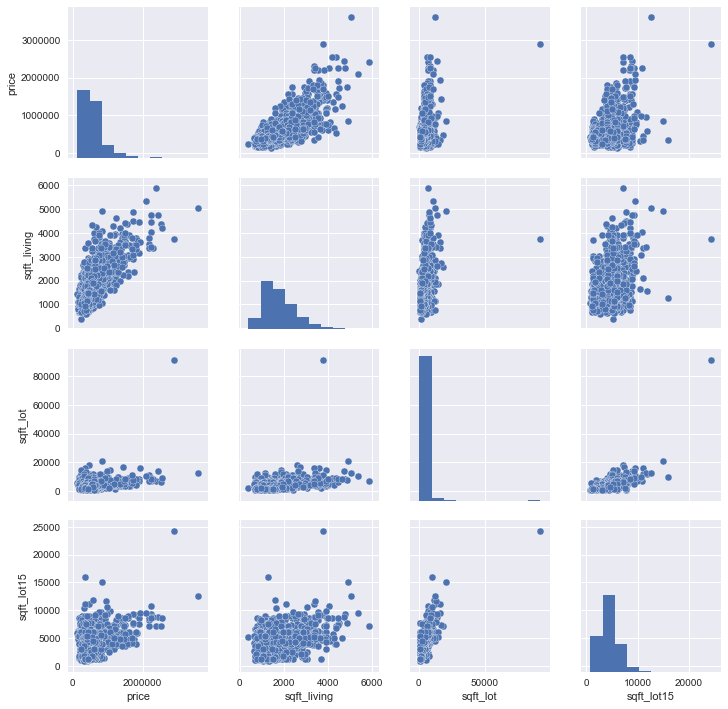

In [66]:
X3 = df_Seattle[['price', 'sqft_living', 'sqft_lot', 'sqft_lot15']]
sns.pairplot(X3);

In [67]:
#df_Seattle[['price', 'sqft_living', 'sqft_lot', 'sqft_lot15']].corr()

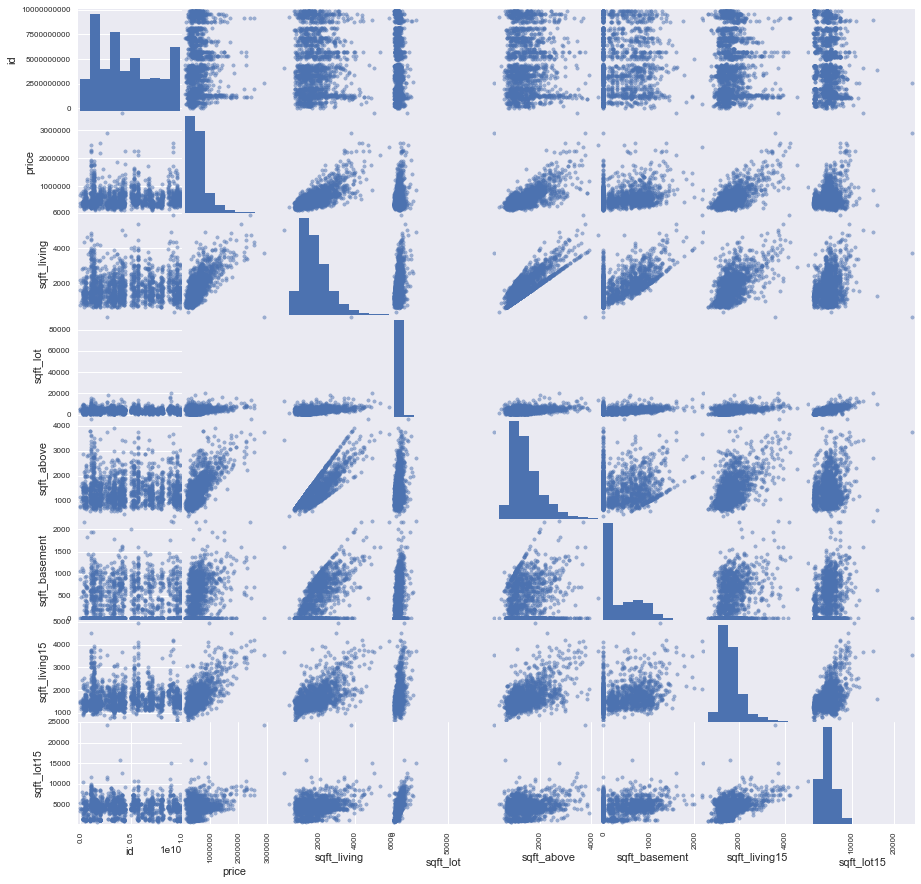

In [68]:
pd.scatter_matrix(df_Seattle,figsize=(15,15))
plt.show();

In [69]:
df_Seattle.corr()

,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
id,1.000000,0.013390,0.030564,-0.040270,0.007851,0.044570,-0.005787,-0.051972
price,0.013390,1.000000,0.731161,0.321884,0.716454,0.350532,0.693641,0.308422
sqft_living,0.030564,0.731161,1.000000,0.323872,0.837322,0.672427,0.625606,0.340382
sqft_lot,-0.040270,0.321884,0.323872,1.000000,0.274955,0.212676,0.366281,0.730456
sqft_above,0.007851,0.716454,0.837322,0.274955,1.000000,0.158384,0.570316,0.248857
sqft_basement,0.044570,0.350532,0.672427,0.212676,0.158384,1.000000,0.357745,0.277827
sqft_living15,-0.005787,0.693641,0.625606,0.366281,0.570316,0.357745,1.000000,0.487384
sqft_lot15,-0.051972,0.308422,0.340382,0.730456,0.248857,0.277827,0.487384,1.000000


Probabilities
-----

What is the probability that it is a 2 bedroom house given that its zip code is 98103?


$$ P(A|B) = \frac{P(A\cap B)}{P(B)} $$

$$ P(Bedroom=2 | zip=98103) = \frac{P(Bedroom=2\cap zip=98103)}{P(zip=98103)} $$

In [70]:
bedrooms_2=0
zip_98103=0
bedrooms_and_zip=0
rows=0
for index, row in df_Seattle.iterrows():
    rows+=1
    #print( row['bedrooms'], row['zipcode'])
    if row['bedrooms']=="2" and row['zipcode']=="98103":
        bedrooms_and_zip+=1
    elif row['bedrooms']=="2":
        bedrooms_2+=1
    elif row['zipcode']=="98103":
        zip_98103+=1
        
bedrooms_2=bedrooms_2+bedrooms_and_zip
p_bedrooms_2=bedrooms_2/rows
zip_98103=zip_98103+bedrooms_and_zip        

p_bedrooms_2=bedrooms_2/rows
p_zip_98103=zip_98103/rows
p_bedrooms_and_zip=bedrooms_and_zip/rows

p=p_bedrooms_and_zip/p_zip_98103

print("prob of 2 bedrooms: ",p_bedrooms_2)
print("prob of zip=98103: ",p_zip_98103)
print("prob of 2 bedrooms and zip=98103: ", p_bedrooms_and_zip)
print("rows: ",rows)
print("P(2 bedrooms|zip=98103): ",p)

prob of 2 bedrooms:  0.24645717806531114
prob of zip=98103:  0.359211337030191
prob of 2 bedrooms and zip=98103:  0.0973505853357979
rows:  1623
P(2 bedrooms|zip=98103):  0.27101200686106347


In [71]:
from numpy.random import binomial
import pandas as pd

n = rows
p = p

bi = pd.Series(binomial(n, p, size=1000))

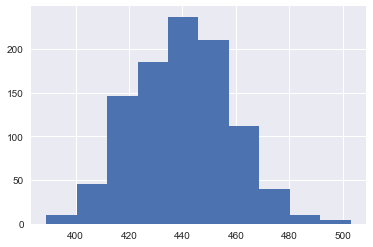

In [72]:
from scipy.stats import binom
simulated_values = binom.rvs(n, p, size=1000)
plt.hist(simulated_values);

What is the probability that the house has been remodeled given that it was built within the past 30 years?


$$ P(A|B) = \frac{P(A\cap B)}{P(B)} $$

$$ P(Remodel=Y | Built=0-30) = \frac{P(Remodel=Y\cap Built=0-30)}{P(Built=0-30)} $$

In [73]:
remodel_y=0
built_0_30=0
#built=0,1,2
remodel_y_and_built_0_30=0
rows=0
for index, row in df_Seattle.iterrows():
    rows+=1
    #print( row['remodel_y'], row['zipcode'])
    if row['remodel']=="1" and int(row['built'])<3:
        remodel_y_and_built_0_30+=1
    elif row['remodel']=="1":
        remodel_y+=1
    elif int(row['built'])<3:
        built_0_30+=1
        
remodel_y=remodel_y+remodel_y_and_built_0_30
built_0_30=built_0_30+remodel_y_and_built_0_30        

p_remodel_y=remodel_y/rows
p_built_0_30=built_0_30/rows

p_remodel_y_and_built_0_30=remodel_y_and_built_0_30/rows

p0=p_remodel_y_and_built_0_30/p_built_0_30

print("prob remodeled: ",p_remodel_y)
print("prob built 0-30 years: ",p_built_0_30)
print("prob remodeled and built 0-30 years: ",p_remodel_y_and_built_0_30)
print("rows: ",rows)
print("P(remodeled|built 0-30): ",p0)

prob remodeled:  0.06900800985828712
prob built 0-30 years:  0.28219346888478125
prob remodeled and built 0-30 years:  0.0
rows:  1623
P(remodeled|built 0-30):  0.0


What is the probability that the house has been remodeled given that it was built 30-70 years?

$$ P(A|B) = \frac{P(A\cap B)}{P(B)} $$

$$ P(Remodel=Y | Built=30-70) = \frac{P(Remodel=Y\cap Built=30-70)}{P(Built=30-70)} $$

In [74]:
remodel_y=0
built_30_70=0
#built=3,4,5,6
remodel_y_and_built_30_70=0
rows=0
for index, row in df_Seattle.iterrows():
    rows+=1
    #print( row['remodel_y'], row['zipcode'])
    if row['remodel']=="1" and 3<=int(row['built'])<=6:
        remodel_y_and_built_30_70+=1
    elif row['remodel']=="1":
        remodel_y+=1
    elif 3<=int(row['built'])<=6:
        built_30_70+=1
        
remodel_y=remodel_y+remodel_y_and_built_30_70
built_30_70=built_30_70+remodel_y_and_built_30_70        

p_remodel_y=remodel_y/rows
p_built_30_70=built_30_70/rows

p_remodel_y_and_built_30_70=remodel_y_and_built_30_70/rows

p1=p_remodel_y_and_built_30_70/p_built_30_70

print("prob remodeled: ",p_remodel_y)
print("prob built 30-70 years: ",p_built_30_70)
print("prob remodeled and built 30-70 years: ",p_remodel_y_and_built_30_70)
print("rows: ",rows)
print("P(remodeled|built 30-70): ",p1)

prob remodeled:  0.06900800985828712
prob built 30-70 years:  0.1866913123844732
prob remodeled and built 30-70 years:  0.012322858903265557
rows:  1623
P(remodeled|built 30-70):  0.066006600660066


What is the probability that the house has been remodeled given that it was built over 70 years ago?

$$ P(A|B) = \frac{P(A\cap B)}{P(B)} $$

$$ P(Remodel=Y | Built=70+) = \frac{P(Remodel=Y\cap Built=70+)}{P(Built=70+)} $$

In [75]:
remodel_y=0
built_70=0
#built=0,1,2
remodel_y_and_built_70=0
rows=0
for index, row in df_Seattle.iterrows():
    rows+=1
    #print( row['remodel_y'], row['zipcode'])
    if row['remodel']=="1" and int(row['built'])>=7:
        remodel_y_and_built_70+=1
    elif row['remodel']=="1":
        remodel_y+=1
    elif int(row['built'])>=7:
        built_70+=1
        
remodel_y=remodel_y+remodel_y_and_built_70
built_70=built_70+remodel_y_and_built_70        

p_remodel_y=remodel_y/rows
p_built_70=built_70/rows

p_remodel_y_and_built_70=remodel_y_and_built_70/rows

p2=p_remodel_y_and_built_70/p_built_70

print("prob remodeled: ",p_remodel_y)
print("prob built 70+ years: ",p_built_70)
print("prob remodeled and built 70+ years: ",p_remodel_y_and_built_70)
print("rows: ",rows)
print("P(remodeled|built 30-70): ",p2)

prob remodeled:  0.06900800985828712
prob built 70+ years:  0.5311152187307455
prob remodeled and built 70+ years:  0.056685150955021565
rows:  1623
P(remodeled|built 30-70):  0.10672853828306265


In [76]:
print("P(remodeled|built 0-30): ",p0)
print("P(remodeled|built 30-70): ",p1)
print("P(remodeled|built 30-70): ",p2)

P(remodeled|built 0-30):  0.0
P(remodeled|built 30-70):  0.066006600660066
P(remodeled|built 30-70):  0.10672853828306265


GLM
-----

In [77]:
results=smf.ols(formula="price~ years_since_sell_2017 + bedrooms + bathrooms + sqft_living + sqft_lot + floors + condition + grade + sqft_above + sqft_basement + zipcode + sqft_living15 + sqft_lot15 +remodel+built ", data=df_Seattle).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     168.4
Date:                Fri, 10 Mar 2017   Prob (F-statistic):               0.00
Time:                        09:33:21   Log-Likelihood:                -21534.
No. Observations:                1623   AIC:                         4.316e+04
Df Residuals:                    1576   BIC:                         4.341e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   5.252e+05   4.57e+04     11.493      0.000      4.36e+05  6.15e+05
years_since_sell_2017[T.3]  -4.73e+04   7770.402     -6.087      0.000     -6.25e+04 -3.21e+04
bedrooms[T.2]               -1.51e+04   2.78e+04     -0.543      0.587     -6.97e+04  3.95e+04
bedrooms[T.3]              -3.806e+04   2.84e+04     -1.339      0.181     -9.38e+04  1.77e+04
bedrooms[T.4]              -5.285e+04      3e+04     -1.764      0.078     -1.12e+05  5914.998
bedrooms[T.5]              -1.089e+05   3.26e+04     -3.339      0.001     -1.73e+05 -4.49e+04
bedrooms[T.6]              -1.897e+05   4.27e+04     -4.439      0.000     -2.74e+05 -1.06e+05
bathrooms[T.1.5]           -1.755e+04    1.5e+04     -1.171      0.242      -4.7e+04  1.19e+04
bathrooms[T.1.75]          -7717.2062   1.47e+04     -0.525      0.600     -3.66e+04  2.11e+04
bathrooms[T.2.0]            -1.65e+04    1.4e+04     -1.179      0.238     -4.39e+04  1.09e+04
bathrooms[T.2.25]          -1.264e+04   1.91e+04     -0.661      0.509     -5.02e+04  2.49e+04
bathrooms[T.2.5]           -2.144e+04   1.72e+04     -1.244      0.214     -5.52e+04  1.24e+04
bathrooms[T.2.75]          -8160.3134    2.2e+04     -0.370      0.711     -5.14e+04  3.51e+04
bathrooms[T.3.0]            1.754e+04   2.18e+04      0.804      0.422     -2.53e+04  6.04e+04
bathrooms[T.3.25]          -1071.7809    2.5e+04     -0.043      0.966     -5.01e+04   4.8e+04
bathrooms[T.3.5]            4.513e+04   2.72e+04      1.658      0.097     -8253.395  9.85e+04
bathrooms[T.3.75]           4.434e+04    3.7e+04      1.198      0.231     -2.83e+04  1.17e+05
floors[T.1.5]              -1.196e+04   1.28e+04     -0.932      0.351     -3.71e+04  1.32e+04
floors[T.2.0]               6053.7641   1.57e+04      0.385      0.700     -2.48e+04  3.69e+04
floors[T.2.5]              -6.613e+04   3.57e+04     -1.855      0.064     -1.36e+05  3803.242
floors[T.3.0]              -3.304e+04   2.31e+04     -1.430      0.153     -7.84e+04  1.23e+04
condition[T.4]              2.614e+04   1.02e+04      2.570      0.010      6186.964  4.61e+04
condition[T.5]              7.807e+04   1.28e+04      6.109      0.000       5.3e+04  1.03e+05
grade[T.6]                 -4.804e+05   3.11e+04    -15.453      0.000     -5.41e+05 -4.19e+05
grade[T.7]                 -4.659e+05   2.75e+04    -16.944      0.000      -5.2e+05 -4.12e+05
grade[T.8]                 -4.083e+05   2.55e+04    -16.025      0.000     -4.58e+05 -3.58e+05
grade[T.9]                 -2.171e+05   2.49e+04     -8.731      0.000     -2.66e+05 -1.68e+05
zipcode[T.98112]            8.343e+04    1.3e+04      6.415      0.000      5.79e+04  1.09e+05
zipcode[T.98118]            -1.95e+05    1.1e+04    -17.652      0.000     -2.17e+05 -1.73e+05
zipcode[T.98144]            -9.86e+04   1.0

In [78]:
df_Seattle1=df_Seattle.drop(["sqft_lot15"],axis=1)
results=smf.ols(formula="price~ years_since_sell_2017 + bedrooms + bathrooms + sqft_living + sqft_lot + floors + condition + grade + sqft_above + sqft_basement + zipcode + sqft_living15  +remodel+built ", data=df_Seattle1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     172.2
Date:                Fri, 10 Mar 2017   Prob (F-statistic):               0.00
Time:                        09:33:46   Log-Likelihood:                -21534.
No. Observations:                1623   AIC:                         4.316e+04
Df Residuals:                    1577   BIC:                         4.341e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   5.271e+05   4.56e+04     11.551      0.000      4.38e+05  6.17e+05
years_since_sell_2017[T.3] -4.715e+04   7767.452     -6.070      0.000     -6.24e+04 -3.19e+04
bedrooms[T.2]              -1.533e+04   2.78e+04     -0.551      0.581     -6.99e+04  3.92e+04
bedrooms[T.3]              -3.804e+04   2.84e+04     -1.339      0.181     -9.38e+04  1.77e+04
bedrooms[T.4]              -5.338e+04      3e+04     -1.782      0.075     -1.12e+05  5363.523
bedrooms[T.5]              -1.094e+05   3.26e+04     -3.355      0.001     -1.73e+05 -4.54e+04
bedrooms[T.6]              -1.905e+05   4.27e+04     -4.459      0.000     -2.74e+05 -1.07e+05
bathrooms[T.1.5]           -1.779e+04    1.5e+04     -1.187      0.235     -4.72e+04  1.16e+04
bathrooms[T.1.75]          -8273.2650   1.47e+04     -0.563      0.573     -3.71e+04  2.05e+04
bathrooms[T.2.0]           -1.697e+04    1.4e+04     -1.214      0.225     -4.44e+04  1.05e+04
bathrooms[T.2.25]          -1.361e+04   1.91e+04     -0.713      0.476     -5.11e+04  2.38e+04
bathrooms[T.2.5]           -2.244e+04   1.72e+04     -1.306      0.192     -5.62e+04  1.13e+04
bathrooms[T.2.75]          -8639.7285    2.2e+04     -0.392      0.695     -5.18e+04  3.46e+04
bathrooms[T.3.0]            1.731e+04   2.18e+04      0.793      0.428     -2.55e+04  6.01e+04
bathrooms[T.3.25]          -1765.8722    2.5e+04     -0.071      0.944     -5.08e+04  4.73e+04
bathrooms[T.3.5]            4.466e+04   2.72e+04      1.642      0.101     -8699.656   9.8e+04
bathrooms[T.3.75]            4.41e+04    3.7e+04      1.191      0.234     -2.85e+04  1.17e+05
floors[T.1.5]              -1.244e+04   1.28e+04     -0.971      0.332     -3.76e+04  1.27e+04
floors[T.2.0]               5153.0848   1.57e+04      0.329      0.743     -2.56e+04  3.59e+04
floors[T.2.5]              -6.763e+04   3.56e+04     -1.900      0.058     -1.37e+05  2202.330
floors[T.3.0]              -3.531e+04   2.29e+04     -1.540      0.124     -8.03e+04  9674.931
condition[T.4]              2.651e+04   1.02e+04      2.608      0.009      6571.610  4.64e+04
condition[T.5]              7.833e+04   1.28e+04      6.132      0.000      5.33e+04  1.03e+05
grade[T.6]                 -4.805e+05   3.11e+04    -15.457      0.000     -5.41e+05  -4.2e+05
grade[T.7]                 -4.662e+05   2.75e+04    -16.955      0.000      -5.2e+05 -4.12e+05
grade[T.8]                 -4.088e+05   2.55e+04    -16.047      0.000     -4.59e+05 -3.59e+05
grade[T.9]                 -2.159e+05   2.48e+04     -8.699      0.000     -2.65e+05 -1.67e+05
zipcode[T.98112]            8.307e+04    1.3e+04      6.392      0.000      5.76e+04  1.09e+05
zipcode[T.98118]           -1.925e+05   1.06e+04    -18.128      0.000     -2.13e+05 -1.72e+05
zipcode[T.98144]           -9.874e+04   1.0

In [79]:
df_Seattle1=df_Seattle.drop(["sqft_lot15","sqft_basement"],axis=1)
results=smf.ols(formula="price~ years_since_sell_2017 + bedrooms +bathrooms + sqft_living + sqft_lot + floors + condition + grade + sqft_above  + zipcode + sqft_living15  +remodel+built ", data=df_Seattle1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     172.2
Date:                Fri, 10 Mar 2017   Prob (F-statistic):               0.00
Time:                        09:34:34   Log-Likelihood:                -21534.
No. Observations:                1623   AIC:                         4.316e+04
Df Residuals:                    1577   BIC:                         4.341e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   5.271e+05   4.56e+04     11.551      0.000      4.38e+05  6.17e+05
years_since_sell_2017[T.3] -4.715e+04   7767.452     -6.070      0.000     -6.24e+04 -3.19e+04
bedrooms[T.2]              -1.533e+04   2.78e+04     -0.551      0.581     -6.99e+04  3.92e+04
bedrooms[T.3]              -3.804e+04   2.84e+04     -1.339      0.181     -9.38e+04  1.77e+04
bedrooms[T.4]              -5.338e+04      3e+04     -1.782      0.075     -1.12e+05  5363.523
bedrooms[T.5]              -1.094e+05   3.26e+04     -3.355      0.001     -1.73e+05 -4.54e+04
bedrooms[T.6]              -1.905e+05   4.27e+04     -4.459      0.000     -2.74e+05 -1.07e+05
bathrooms[T.1.5]           -1.779e+04    1.5e+04     -1.187      0.235     -4.72e+04  1.16e+04
bathrooms[T.1.75]          -8273.2650   1.47e+04     -0.563      0.573     -3.71e+04  2.05e+04
bathrooms[T.2.0]           -1.697e+04    1.4e+04     -1.214      0.225     -4.44e+04  1.05e+04
bathrooms[T.2.25]          -1.361e+04   1.91e+04     -0.713      0.476     -5.11e+04  2.38e+04
bathrooms[T.2.5]           -2.244e+04   1.72e+04     -1.306      0.192     -5.62e+04  1.13e+04
bathrooms[T.2.75]          -8639.7285    2.2e+04     -0.392      0.695     -5.18e+04  3.46e+04
bathrooms[T.3.0]            1.731e+04   2.18e+04      0.793      0.428     -2.55e+04  6.01e+04
bathrooms[T.3.25]          -1765.8722    2.5e+04     -0.071      0.944     -5.08e+04  4.73e+04
bathrooms[T.3.5]            4.466e+04   2.72e+04      1.642      0.101     -8699.656   9.8e+04
bathrooms[T.3.75]            4.41e+04    3.7e+04      1.191      0.234     -2.85e+04  1.17e+05
floors[T.1.5]              -1.244e+04   1.28e+04     -0.971      0.332     -3.76e+04  1.27e+04
floors[T.2.0]               5153.0848   1.57e+04      0.329      0.743     -2.56e+04  3.59e+04
floors[T.2.5]              -6.763e+04   3.56e+04     -1.900      0.058     -1.37e+05  2202.330
floors[T.3.0]              -3.531e+04   2.29e+04     -1.540      0.124     -8.03e+04  9674.931
condition[T.4]              2.651e+04   1.02e+04      2.608      0.009      6571.610  4.64e+04
condition[T.5]              7.833e+04   1.28e+04      6.132      0.000      5.33e+04  1.03e+05
grade[T.6]                 -4.805e+05   3.11e+04    -15.457      0.000     -5.41e+05  -4.2e+05
grade[T.7]                 -4.662e+05   2.75e+04    -16.955      0.000      -5.2e+05 -4.12e+05
grade[T.8]                 -4.088e+05   2.55e+04    -16.047      0.000     -4.59e+05 -3.59e+05
grade[T.9]                 -2.159e+05   2.48e+04     -8.699      0.000     -2.65e+05 -1.67e+05
zipcode[T.98112]            8.307e+04    1.3e+04      6.392      0.000      5.76e+04  1.09e+05
zipcode[T.98118]           -1.925e+05   1.06e+04    -18.128      0.000     -2.13e+05 -1.72e+05
zipcode[T.98144]           -9.874e+04   1.0

Hypothesis Testing
-----

The average sale for a 2 bedroom unit was higher in 2015 than in 2014 for all of king county. 

$H_0: xbar 2015 - xbar 2014 <=0$  
$H_a: xbar 2015 - xbar 2014 >0$  

.05 sign

In [80]:
i=0
lst=[]
while i<=1000:
    two_bedroom_3 = king[king.bedrooms == 2]
    two_bedroom_3 = two_bedroom_3[two_bedroom_3.years_since_sell_2017 == 3]
    two_bedroom_2 = king[king.bedrooms == 2]
    two_bedroom_2 = two_bedroom_2[two_bedroom_2.years_since_sell_2017 == 2]

    two_bedroom_2_sample = two_bedroom_2.sample(frac=0.5)
    two_bedroom_3_sample = two_bedroom_3.sample(frac=0.5)
    

    s1 = two_bedroom_2_sample["price"]
    s2 = two_bedroom_3_sample["price"]
    t_stat, p_val = stats.ttest_ind(s1, s2, equal_var=False)
    t_stat
    p_val
    lst.append(p_val)
    i+=1
print("p-value: ",sum(lst)/1000)

    
    


p-value:  0.471289519404


No, therefore we cannot reject the null.

The average sale for a 2 bedroom unit was higher in 2015 than in 2014 for selected zip codes. 

$H_0: xbar 2015 - xbar 2014 <=0$  
$H_a: xbar 2015 - xbar 2014 >0$  

.05 sign

In [81]:
i=0
lst=[]
while i<=1000:
    two_bedroom_3 = df_Seattle[df_Seattle.bedrooms == "2"]
    two_bedroom_3 = two_bedroom_3[two_bedroom_3.years_since_sell_2017 == "3"]
    two_bedroom_2 = df_Seattle[df_Seattle.bedrooms == "2"]
    two_bedroom_2 = two_bedroom_2[two_bedroom_2.years_since_sell_2017 == "2"]


    two_bedroom_2_sample = two_bedroom_2.sample(frac=0.5)
    two_bedroom_3_sample = two_bedroom_3.sample(frac=0.5)
    
    s1 = two_bedroom_2_sample["price"]
    s2 = two_bedroom_3_sample["price"]
    t_stat, p_val = stats.ttest_ind(s1, s2, equal_var=False)
    t_stat
    p_val
    lst.append(p_val)
    i+=1
print("p-value: ",sum(lst)/1000)

p-value:  0.570409607912


The average sale for a 3 bedroom unit was higher in 2015 than in 2014 for all of king county. 

$H_0: xbar 2015 - xbar 2014 <=0$  
$H_a: xbar 2015 - xbar 2014 >0$  

.05 sign

In [82]:
i=0
lst=[]
while i<=1000:
    two_bedroom_3 = king[king.bedrooms == 3]
    two_bedroom_3 = two_bedroom_3[two_bedroom_3.years_since_sell_2017 == 3]
    two_bedroom_2 = king[king.bedrooms == 3]
    two_bedroom_2 = two_bedroom_2[two_bedroom_2.years_since_sell_2017 == 2]

    two_bedroom_2_sample = two_bedroom_2.sample(frac=0.5)
    two_bedroom_3_sample = two_bedroom_3.sample(frac=0.5)
    

    s1 = two_bedroom_2_sample["price"]
    s2 = two_bedroom_3_sample["price"]
    t_stat, p_val = stats.ttest_ind(s1, s2, equal_var=False)
    t_stat
    p_val
    lst.append(p_val)
    i+=1
print("p-value: ",sum(lst)/1000)


p-value:  0.333517819057


The average sale for a 3 bedroom unit was higher in 2015 than in 2014 for selected zip codes. 

$H_0: xbar 2015 - xbar 2014 <=0$  
$H_a: xbar 2015 - xbar 2014 >0$  

.05 sign

In [83]:
i=0
lst=[]
while i<=1000:
    two_bedroom_3 = df_Seattle[df_Seattle.bedrooms == "3"]
    two_bedroom_3 = two_bedroom_3[two_bedroom_3.years_since_sell_2017 == "3"]
    two_bedroom_2 = df_Seattle[df_Seattle.bedrooms == "3"]
    two_bedroom_2 = two_bedroom_2[two_bedroom_2.years_since_sell_2017 == "2"]


    two_bedroom_2_sample = two_bedroom_2.sample(frac=0.5)
    two_bedroom_3_sample = two_bedroom_3.sample(frac=0.5)
    
    s1 = two_bedroom_2_sample["price"]
    s2 = two_bedroom_3_sample["price"]
    t_stat, p_val = stats.ttest_ind(s1, s2, equal_var=False)
    t_stat
    p_val
    lst.append(p_val)
    i+=1
print("p-value: ",sum(lst)/1000)

p-value:  0.580953005887
